<a href="https://colab.research.google.com/github/Mathan3006/PRODIGY_ML_02/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a synthetic purchase history dataset
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers (1).csv')
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


In [18]:
#Select features for clustering
features = data[['Annual Income (k$)','Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


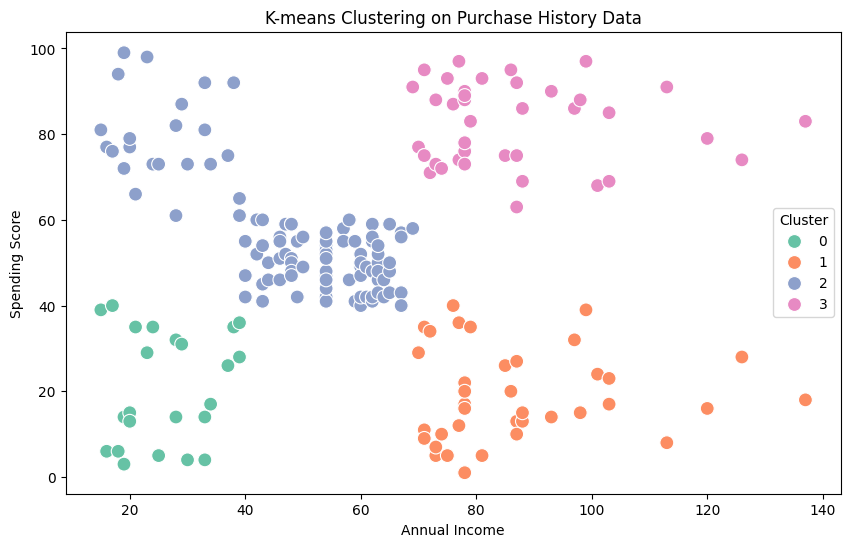

In [22]:
# Visualize the clusters in a 2D space (AnnualIncome vs SpendingScore)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set2', s=100)
plt.title('K-means Clustering on Purchase History Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

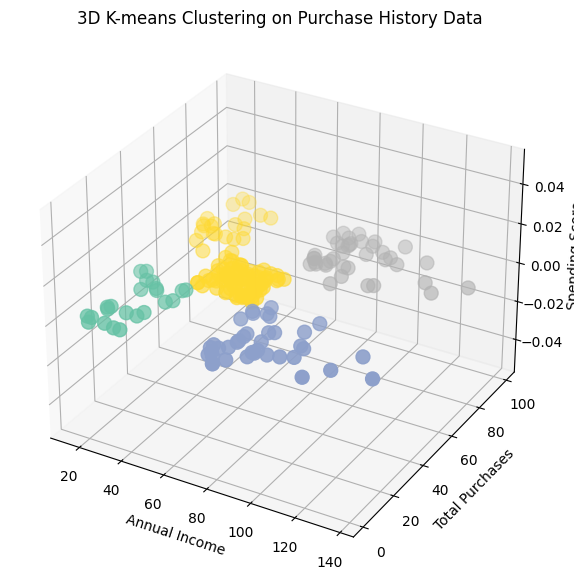

In [25]:
# Visualize 3D clusters using the features
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c=data['Cluster'], cmap='Set2', s=100)
ax.set_title('3D K-means Clustering on Purchase History Data')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Total Purchases')
ax.set_zlabel('Spending Score')
plt.show()